## Climlab Project Master Program

In [1]:
! pip install climlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for climlab: filename=climlab-0.8.2-py3-none-any.whl size=171438 sha256=f673cc111f70e128e24921b04e1d20c6ea7686b4a44e7a8781f82f7638c6d930
  Stored in directory: /root/.cache/pip/wheels/b8/de/bb/3a39e440567925a2df52134308d3cc424f69bbe4e854a3de35
Successfully built climlab


Step 1: Assign values to orbital elements and other constants
## <ins> NOTE: These value are to be changed based on your system </ins>

In [ ]:
import numpy as np

typea = "s" # either seasonal (s) or annual (a)
num_orb = 365 # number of days(s)/orbits(a) to integrate over
orbits = np.arange(0,num_orb+1,1)

obl_omega = 10 # obliquity frequency
obl_amp = 10 # obliquity amplitude
obl_cnst = 20 # obliquity center value (Earth = 23.5)
obl_var = obl_cnst + obl_amp*np.sin(obl_omega*orbits) # assumes a sin wave variance in obliquity

ecc_omega = 20 # obliquity frequency
ecc_amp = 0.2 # obliquity amplitude
ecc_cnst = 0.4 # obliquity center value (Earth = 0.01)
ecc_var = ecc_cnst + ecc_amp*np.sin(ecc_omega*orbits) # assumes a sin wave variance in eccentricity

Flux = 1361 # solar constant (Earth = 1361) in W/m^2

A, B, D, water_depth, timestep, Tf,CO2_ppm = 220, 2, 0.55, 2, 86400, -2, 421  #emission at 0 degrees, increase in emission per degree, concentration of CO2 in ppm (default = 300)

plot_type = 'm' # the type of plt you want the results to be in, contour (c) or colormesh (m)


Step 2: Run ClimLab with your assigned values

In [ ]:
import climlab
from climlab import constants as const
from climlab.radiation import AplusBT_CO2

lat = np.arange(0,91,1)

orb = {'ecc': ecc_var[0], 'long_peri': 0, 'obliquity': obl_var[0]}
if typea == "s":
  ebm_model = climlab.EBM_seasonal(num_lat=len(lat),S0=Flux,Tf=Tf,D=D,A=A,B=B,water_depth=water_depth,orb=orb,timestep=timestep)

if typea == "a":
  ebm_model = climlab.EBM_annual(num_lat=len(lat),S0=Flux,Tf=Tf,D=D,A=A,B=B,water_depth=water_depth,orb=orb,timestep=timestep)

print(ebm_model.param) # tells us what our parameters are

LW_CO2 = AplusBT_CO2(CO2=CO2_ppm, state=ebm_model.state, **ebm_model.param)
ebm_model.add_subprocess('LW', LW_CO2)
ebm_model.integrate_years(10,verbose=False) # brings our model to convergence

X,Y,Z = np.ones(0),np.ones(0),np.ones(0)
cnt = 0
f = open("climlab_data.txt", 'w')

for o in orbits[:-1]:
    X = np.append(X,np.ones(len(lat))*o)
    Y = np.append(Y,ebm_model.lat)
    Z = np.append(Z,np.array(ebm_model.Ts))
    cnt+=1
    Ts = ebm_model.global_mean_temperature()
    if typea == 's':
      print("For day %1.0f, the global mean temperature is %1.4g." % (o, Ts))
      ebm_model = climlab.EBM_annual(num_lat=len(lat),S0=Flux,T0=Ts,Tf=-2,orb=orb,timestep=86400)
      ebm_model.integrate_years(1,verbose=False)
    if typea == 'a':
      print("For orbit %1.0f, the global mean temperature is %1.4g." % (o, Ts))
      ebm_model = climlab.EBM_seasonal(num_lat=len(lat),S0=Flux,T0=Ts,Tf=-2,orb=orb,timestep=86400)
      ebm_model.integrate_days(1,verbose=False)
    orb = {'ecc': ecc_var[cnt], 'long_peri': 0, 'obliquity': obl_var[cnt]}
    '''
    if typea == 's':
      ebm_model = climlab.EBM_annual(num_lat=len(lat),S0=Flux,T0=Ts,Tf=-2,orb=orb,timestep=86400)
      ebm_model.integrate_years(1,verbose=False)
    if typea == 'a':
      ebm_model = climlab.EBM_seasonal(num_lat=len(lat),S0=Flux,T0=Ts,Tf=-2,orb=orb,timestep=86400)
      ebm_model.integrate_days(1,verbose=False)
      '''
    string = '%i, %i, %2.5f\n' %(X[o],Y[o],Z[o])
    f.write(string)
f.close()

{'orb': {'ecc': 0.0, 'long_peri': 0, 'obliquity': 20.0}, 'timestep': 86400, 'S0': 1361, 's2': -0.48, 'A': 220, 'B': 2, 'D': 0.55, 'water_depth': 2, 'a0': 0.33, 'a2': 0.25}
For day 0, the global mean temperature is 15.71.
For day 1, the global mean temperature is 13.88.
For day 2, the global mean temperature is 13.81.
For day 3, the global mean temperature is 12.71.
For day 4, the global mean temperature is 13.75.
For day 5, the global mean temperature is 12.85.
For day 6, the global mean temperature is 13.42.
For day 7, the global mean temperature is 13.57.
For day 8, the global mean temperature is 12.79.
For day 9, the global mean temperature is 13.77.
For day 10, the global mean temperature is 12.72.
For day 11, the global mean temperature is 13.53.
For day 12, the global mean temperature is 13.43.
For day 13, the global mean temperature is 12.92.
For day 14, the global mean temperature is 13.78.
For day 15, the global mean temperature is 12.64.
For day 16, the global mean temperatur

Step 3: Show the Energy Balance Model (plot the results)

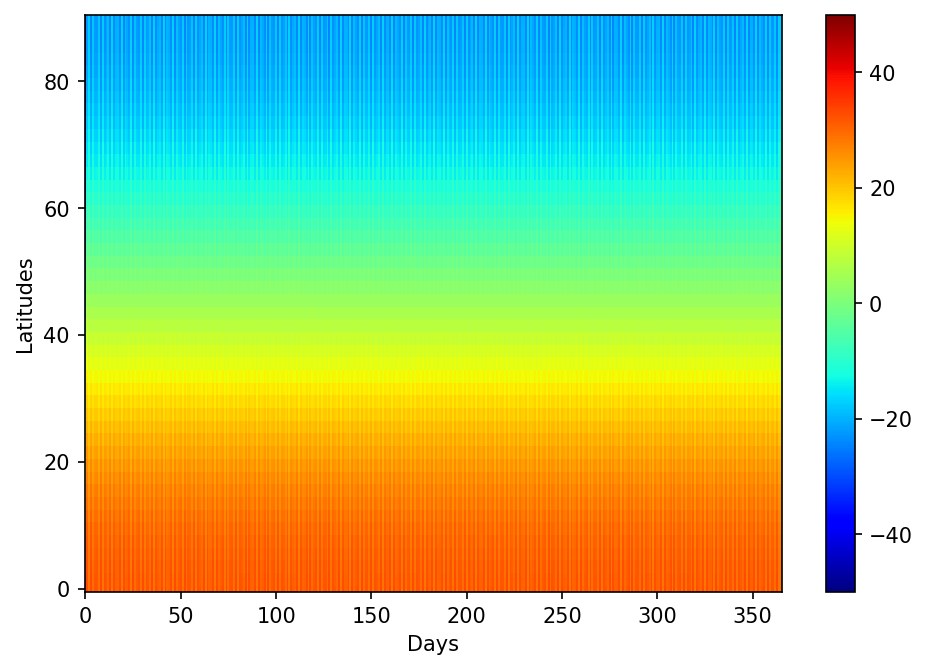

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.colors as colors
import matplotlib.cm as cm

vmin = -50
vmax = 50
my_cmap = matplotlib.colormaps['jet']
norm = colors.Normalize(vmin,vmax)
cmmapable = cm.ScalarMappable(norm,my_cmap)
cmmapable.set_array(range(0,1))
my_cmap.set_over('w')
my_cmap.set_under('gray')

width = 5

fig = plt.figure(figsize=(1.5*width,width),dpi=150)
ax = fig.add_subplot(111)

zi = griddata((X,Y),Z,(orbits[None,:],lat[:,None]),method='nearest')
if plot_type == 'c':
  CS = ax.contour(orbits,lat,zi,levels=np.arange(vmin,vmax,width),cmap=my_cmap,vmin=vmin,vmax=vmax)
if plot_type == 'm':
  CS = ax.pcolormesh(orbits,lat,zi,cmap=my_cmap,vmin=vmin,vmax=vmax)
plt.colorbar(CS);
ax.set_ylabel("Latitudes", fontsize = 10)

if typea == 's':
  ax.set_xlabel("Days", fontsize = 10)
if typea == 'a':
  ax.set_xlabel("Orbits", fontsize = 10)
